# Introduction to the Project

We will be analyzing a movies data set from TMDB. 

We will be:
- Cleaning the data
- Storing the data in a database
- Analyzing/Visualizing the data
- Building predictive models

# Step 0: Imports and file loading

In [11]:
!pip3 install pandas

In [12]:
import pandas as pd

In [13]:
movies_raw = pd.read_csv('tmdb_movies.csv')

print(len(movies_raw), 'movies loaded')

1131886 movies loaded


# Step 1: Data Comprehension and Cleaning

This step consists of the following tasks:
- Examining the data
- Deciding which data to discard
- Cleaning the remaining data

## Step 1.1: Examining the data

We will explore the columns of the dataset and their types.

In [14]:
print(movies_raw.head())

       id            title  vote_average  vote_count    status release_date  \
0   27205        Inception         8.364       34495  Released   2010-07-15   
1  157336     Interstellar         8.417       32571  Released   2014-11-05   
2     155  The Dark Knight         8.512       30619  Released   2008-07-16   
3   19995           Avatar         7.573       29815  Released   2009-12-15   
4   24428     The Avengers         7.710       29166  Released   2012-04-25   

      revenue  runtime  adult                     backdrop_path  ...  \
0   825532764      148  False  /8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg  ...   
1   701729206      169  False  /pbrkL804c8yAv3zBZR4QPEafpAR.jpg  ...   
2  1004558444      152  False  /nMKdUUepR0i5zn0y1T4CsSB5chy.jpg  ...   
3  2923706026      162  False  /vL5LR6WdxWPjLPFRLe133jXWsh5.jpg  ...   
4  1518815515      143  False  /9BBTo63ANSmhC4e6r62OJFuK2GL.jpg  ...   

    original_title                                           overview  \
0        Inception 

In [15]:
print(movies_raw.columns)

Index(['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'adult', 'backdrop_path', 'budget', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'tagline', 'genres',
       'production_companies', 'production_countries', 'spoken_languages',
       'keywords'],
      dtype='object')


## Step 1.2: Deciding which data to discard

After viewing the list of columns, we will decide which columns to keep and which to discard.

Columns to keep:
- title
- vote_average
- release_date
- revenue
- runtime
- budget
- genres
- keywords

Records to discard:
- Any rows with `adult` set to `True`. We want to keep this data family-friendly.
- Any rows with `vote_count` set to 0. We want to keep only the movies that have been rated by the public.
- Any rows with `budget` set to 0. We want to keep only the movies that have a budget.
- Any rows with `status` not set to `Released`. We want to keep only the movies that have been released.
- Duplicate rows.

## Step 1.3: Cleaning the remaining data

1. Discarding the records we don't need.
2. Discarding the columns we don't need. 
3. Discarding any duplicate rows.
4. Discarding any rows with missing values.
5. Check the data types of the columns and convert them to the correct data types if necessary.

In [16]:
# initializing the cleaned movies dataframe
movies_cleaned = movies_raw.copy()

print(len(movies_raw), 'movies before cleaning')


# Remove unneeded records

# Remove adult movies
movies_cleaned = movies_cleaned[movies_cleaned['adult'] == False]
print(len(movies_cleaned), 'movies after removing adult movies')

# Remove movies with no vote count
movies_cleaned = movies_cleaned[movies_cleaned['vote_count'] > 0]
print(len(movies_cleaned), 'movies after removing movies with no vote count')

# Remove movies with no budget
movies_cleaned = movies_cleaned[movies_cleaned['budget'] > 0]
print(len(movies_cleaned), 'movies after removing movies with no budget')

# Remove movies that aren't released
movies_cleaned = movies_cleaned[movies_cleaned['status'] == 'Released']
print(len(movies_cleaned), 'movies after removing movies that are not released')

1131886 movies before cleaning
10263931026393 movies after removing adult movies
330547 movies after removing movies with no vote count
27124 movies after removing movies with no budget
27112 movies after removing movies that are not released


In [17]:
# Discarding columns that are not needed

columns_to_keep = ['id','title', 'vote_average', 'release_date', 'revenue', 'runtime', 'budget', 'genres', 'keywords']

movies_cleaned = movies_cleaned[columns_to_keep]

print(movies_cleaned.head())

       id            title  vote_average release_date     revenue  runtime  \
0   27205        Inception         8.364   2010-07-15   825532764      148   
1  157336     Interstellar         8.417   2014-11-05   701729206      169   
2     155  The Dark Knight         8.512   2008-07-16  1004558444      152   
3   19995           Avatar         7.573   2009-12-15  2923706026      162   
4   24428     The Avengers         7.710   2012-04-25  1518815515      143   

      budget                                       genres  \
0  160000000           Action, Science Fiction, Adventure   
1  165000000            Adventure, Drama, Science Fiction   
2  185000000               Drama, Action, Crime, Thriller   
3  237000000  Action, Adventure, Fantasy, Science Fiction   
4  220000000           Science Fiction, Action, Adventure   

                                            keywords  
0  rescue, mission, dream, airplane, paris, franc...  
1  rescue, future, spacecraft, race against time,...  

In [18]:
# Discarding duplicates

movies_cleaned = movies_cleaned.drop_duplicates()
print(len(movies_cleaned), 'movies after removing duplicates')

# Discarding records with missing values
movies_cleaned = movies_cleaned.dropna()
print(len(movies_cleaned), 'movies after removing records with missing values')

27108 movies after removing duplicates
18977 movies after removing records with missing values


### Data Type Cleanup

Each column should be the following type:
- `id`: integer
- `title`: string
- `vote_average`: float
- `release_date`
  - Since we don't need the exact month/day, we will only keep the year. This can be converted to an integer.
  - We will change the column name to `release_year`.
- `revenue`: integer
- `runtime`: integer
- `budget`: integer
- `popularity`: float
- `genres`: string
- `keywords`: string

In [19]:
# Type cleanup

# Print the types of each column
print(movies_cleaned.dtypes)

# Clean up the release_date column
# Extract the year (first 4 characters) and convert to integer
# Rename the column to release_year
movies_cleaned['release_date'] = movies_cleaned['release_date'].str[:4].astype(int)
movies_cleaned.rename(columns={'release_date': 'release_year'}, inplace=True)

print(movies_cleaned.head())

id                int64
title            object
vote_average    float64
release_date     object
revenue           int64
runtime           int64
budget            int64
genres           object
keywords         object
dtype: object
       id            title  vote_average  release_year     revenue  runtime  \
0   27205        Inception         8.364          2010   825532764      148   
1  157336     Interstellar         8.417          2014   701729206      169   
2     155  The Dark Knight         8.512          2008  1004558444      152   
3   19995           Avatar         7.573          2009  2923706026      162   
4   24428     The Avengers         7.710          2012  1518815515      143   

      budget                                       genres  \
0  160000000           Action, Science Fiction, Adventure   
1  165000000            Adventure, Drama, Science Fiction   
2  185000000               Drama, Action, Crime, Thriller   
3  237000000  Action, Adventure, Fantasy, Science F

# Step 2: Storing the data in a database

We will store the cleaned data in a SQLite database. We will create a table called `movies` and insert the data into it.

## Database Schema

The `movies` table will have the following columns:
- `id`: INTEGER PRIMARY KEY
- `title`: VARCHAR
- `vote_average`: FLOAT
- `release_year`: INTEGER
- `revenue`: INTEGER
- `runtime`: INTEGER
- `budget`: INTEGER
- `genres`: VARCHAR
- `keywords`: VARCHAR

None of the columns will allow NULL values.

In [20]:
import sqlite3

conn = sqlite3.connect('movies.db')
cursor = conn.cursor()

create_table = '''
CREATE TABLE movies (
    id INTEGER PRIMARY KEY,
    title TEXT NOT NULL,
    vote_average REAL NOT NULL,
    release_year INTEGER NOT NULL,
    revenue INTEGER NOT NULL,
    runtime INTEGER NOT NULL,
    budget INTEGER NOT NULL,
    genres TEXT NOT NULL,
    keywords TEXT NOT NULL
);
'''

cursor.execute(create_table)
conn.commit()

In [21]:
# Describing the SQL table
cursor.execute('PRAGMA table_info(movies);')
cursor.fetchall()

[(0, 'id', 'INTEGER', 0, None, 1),
 (1, 'title', 'TEXT', 1, None, 0),
 (2, 'vote_average', 'REAL', 1, None, 0),
 (3, 'release_year', 'INTEGER', 1, None, 0),
 (4, 'revenue', 'INTEGER', 1, None, 0),
 (5, 'runtime', 'INTEGER', 1, None, 0),
 (6, 'budget', 'INTEGER', 1, None, 0),
 (7, 'genres', 'TEXT', 1, None, 0),
 (8, 'keywords', 'TEXT', 1, None, 0)]

## Inserting the Data

In [22]:
# Inserting the cleaned data into the SQL table
for index, row in movies_cleaned.iterrows():
    insert_sql = '''
    INSERT INTO movies (id, title, vote_average, release_year, revenue, runtime, budget, genres, keywords)
    VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?);
    '''
    cursor.execute(insert_sql, tuple(row))

# Step 3: Analyzing/Visualizing the data

We will first query the database to explore some patterns and ideas in the data. We will then visualize some more complex relationships.

## Step 3.1: Database Queries

Some questions we will answer (in order of increasing complexity):
- Which 10 movies have the highest revenue?
- What is the average revenue of movies released each year since 2000?
- What is the longest movie every year since 2000?

In [23]:
def run_query(query):
    cursor.execute(query)
    return cursor.fetchall()

In [24]:
# 10 movies with the highest revenue
query_top10 = '''
SELECT title, release_year, revenue
FROM movies
ORDER BY revenue DESC
LIMIT 10;
'''

run_query(query_top10)

[('TikTok Rizz Party', 2024, 3000000000),
 ('Avatar', 2009, 2923706026),
 ('Avengers: Endgame', 2019, 2800000000),
 ('Avatar: The Way of Water', 2022, 2320250281),
 ('Titanic', 1997, 2264162353),
 ('Star Wars: The Force Awakens', 2015, 2068223624),
 ('Avengers: Infinity War', 2018, 2052415039),
 ('Spider-Man: No Way Home', 2021, 1921847111),
 ('Jurassic World', 2015, 1671537444),
 ('The Lion King', 2019, 1663075401)]

In [25]:
# Average revenue of movies released each year from 2000 to 2020
query_avg_revenue = '''
SELECT release_year, AVG(revenue)
FROM movies
WHERE release_year BETWEEN 2000 AND 2020
GROUP BY release_year
ORDER BY release_year;
'''

run_query(query_avg_revenue)

[(2000, 49320522.35797665),
 (2001, 52180193.9862069),
 (2002, 52325932.7073955),
 (2003, 57466050.39261745),
 (2004, 46218535.71428572),
 (2005, 40541261.79118329),
 (2006, 38088290.20647773),
 (2007, 38093211.96526508),
 (2008, 40056115.37569061),
 (2009, 41753390.09326425),
 (2010, 41661744.09217391),
 (2011, 42494804.20032841),
 (2012, 44144644.291666664),
 (2013, 38210344.71568628),
 (2014, 37834552.60733695),
 (2015, 38025548.87466307),
 (2016, 40344976.4038961),
 (2017, 40902901.09018568),
 (2018, 39114226.737617135),
 (2019, 42170149.05780347),
 (2020, 8454342.57766143)]

In [26]:
# Longest movie each year from 2000 to present (1 movie per year)
query_longest_movie = '''
SELECT release_year, title, runtime
FROM movies
WHERE release_year BETWEEN 2000 AND 2020
GROUP BY release_year
HAVING runtime = MAX(runtime)
ORDER BY release_year;
'''

run_query(query_longest_movie)

[(2000, 'Mohabbatein', 216),
 (2001, 'Lagaan: Once Upon a Time in India', 224),
 (2002, 'Jee Aayan Nu', 187),
 (2003, 'Gods and Generals', 219),
 (2004, 'Kingdom Hospital', 608),
 (2005, 'No Direction Home: Bob Dylan', 208),
 (2006, 'Confessions of a Dog', 195),
 (2007, 'Salaam-e-Ishq', 216),
 (2008, 'Beijing 2008 Olympic Opening Ceremony', 240),
 (2009, 'Kerala Varma Pazhassi Raja', 197),
 (2010, 'Carlos', 339),
 (2011, 'Kill Bill: The Whole Bloody Affair', 247),
 (2012, 'Barabbas', 192),
 (2013, 'Bhaag Milkha Bhaag', 186),
 (2014, 'From What Is Before', 345),
 (2015, 'Dyakon Levski', 210),
 (2016, 'Kammatipaadam', 177),
 (2017, 'Europa: The Last Battle', 746),
 (2018, 'God of War', 999),
 (2019, '2019: A Cinematic Odyssey', 480),
 (2020, 'From Bedrooms to Billions: The PlayStation Revolution', 202)]

## Step 3.2: Data Visualization

We will visualize the following relationships:
- Number of movies released each year from 1922 to 2022 (bar chart)
- Average revenue of movies released each year from 1950 to 2022 (line chart)
- Average runtime of movies released each year since 2000 (line chart)

We will be using the `matplotlib` library for visualization.

In [27]:
!pip3 install matplotlib
import matplotlib.pyplot as plt

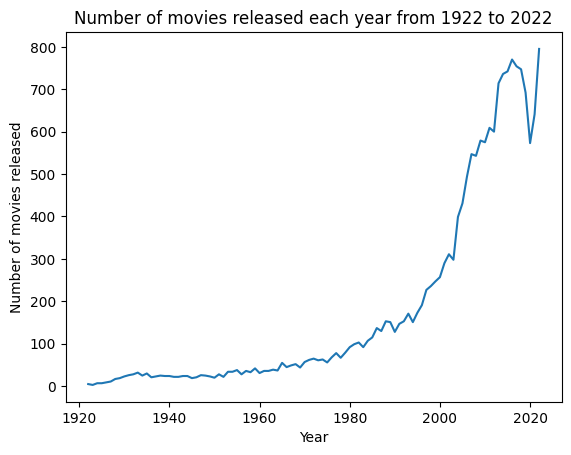

In [28]:
# Number of movies released each year from 1922 to 2022
query_movies_per_year = '''
SELECT release_year, COUNT(*)
FROM movies
WHERE release_year BETWEEN 1922 AND 2022
GROUP BY release_year
ORDER BY release_year;
'''

movies_per_year = run_query(query_movies_per_year)

years = [row[0] for row in movies_per_year]
num_movies = [row[1] for row in movies_per_year]

plt.plot(years, num_movies)
plt.xlabel('Year')
plt.ylabel('Number of movies released')
plt.title('Number of movies released each year from 1922 to 2022')
plt.show()

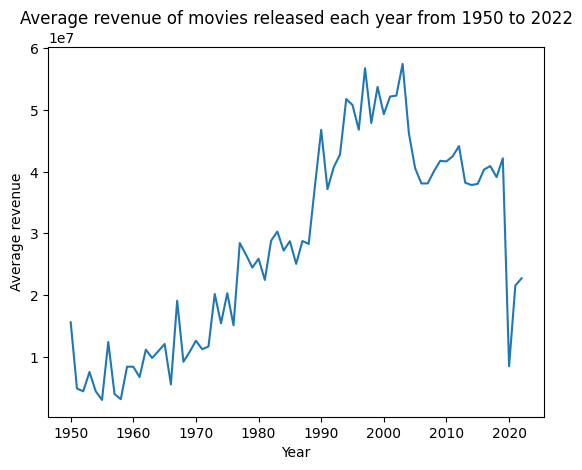

In [29]:
# Average revenue of movies released each year from 1950 to 2022
query_avg_revenue = '''
SELECT release_year, AVG(revenue)
FROM movies
WHERE release_year BETWEEN 1950 AND 2022
GROUP BY release_year
ORDER BY release_year;
'''

avg_revenue = run_query(query_avg_revenue)

years = [row[0] for row in avg_revenue]
revenue = [row[1] for row in avg_revenue]

plt.plot(years, revenue)
plt.xlabel('Year')
plt.ylabel('Average revenue')
plt.title('Average revenue of movies released each year from 1950 to 2022')
plt.show()

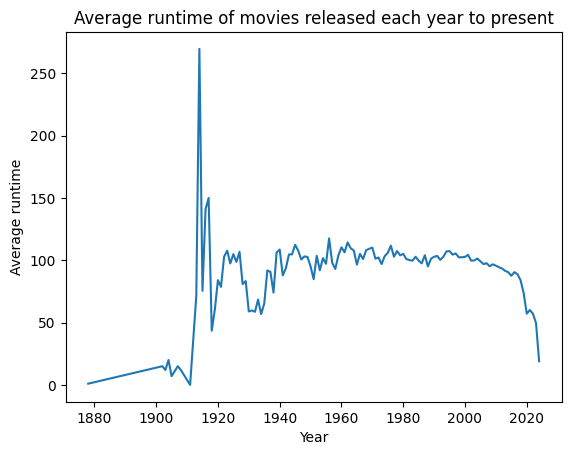

In [30]:
# Average runtime of movies released each year to present
query_avg_runtime = '''
SELECT release_year, AVG(runtime)
FROM movies
GROUP BY release_year
ORDER BY release_year;
'''

avg_runtime = run_query(query_avg_runtime)

years = [row[0] for row in avg_runtime]
runtime = [row[1] for row in avg_runtime]

plt.plot(years, runtime)
plt.xlabel('Year')
plt.ylabel('Average runtime')
plt.title('Average runtime of movies released each year to present')
plt.show()

# Step 4: Building Predictive Models

We will build a predictive model to predict the revenue of a movie based on the following features:
- `release_year`
- `vote_average`
- `runtime`
- `budget`

We will use the `scikit-learn` library to build the model. We will split the data into training and testing sets, train the model, and evaluate its performance. We will use the `R^2` score to evaluate the model.

In [31]:
!pip3 install scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [32]:
# Let's predict revenue based on release year, runtime, budget, and rating

# Split the data into training and testing sets
X = movies_cleaned[['release_year', 'runtime', 'budget', 'vote_average']]
y = movies_cleaned['revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate the correlation R^2
r2 = model.score(X_test, y_test)
print('Correlation R^2:', r2)

Correlation R^2: 0.5509394161784363


## Using the Model

We will use the model to predict the revenue of a movie with the following features:
- `release_year`: 2022
- `vote_average`: 7.5
- `runtime`: 120
- `budget`: 10,000,000

In [33]:
pred_release_year = 2022
pred_runtime = 120
pred_budget = 10000000
pred_rating = 7.5

pred_revenue = model.predict([[pred_release_year, pred_runtime, pred_budget, pred_rating]])[0]
print('Predicted revenue:', pred_revenue)

Predicted revenue: 26244374.22721669


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
